In [22]:
%matplotlib notebook
import os
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.widgets import CheckButtons
from matplotlib.widgets import RadioButtons
from matplotlib.widgets import Button

In [12]:
#loading in datasets
fp_csv = os.path.join('data','OA plots','m1a1','Maldives-atoll-1.csv')
fp_l1 = os.path.join('data','OA plots','m1a1','Photons','Maldives-atoll-1-photons-1.csv')
fp_l2 = os.path.join('data','OA plots','m1a1','Photons','Maldives-atoll-1-photons-2.csv')
fp_l3 = os.path.join('data','OA plots','m1a1','Photons','Maldives-atoll-1-photons-3.csv')
fp_l4 = os.path.join('data','OA plots','m1a1','Photons','Maldives-atoll-1-photons-4.csv')
fp_l5 = os.path.join('data','OA plots','m1a1','Photons','Maldives-atoll-1-photons-5.csv')
fp_l6 = os.path.join('data','OA plots','m1a1','Photons','Maldives-atoll-1-photons-6.csv')

In [8]:
#method to clean the column headers of dataframes
def clean_columns(df):
    return ['Latitude', 'Longitude','Height','confidence code']

In [9]:
#loading in df for each laser
l1 = pd.read_csv(fp_l1)
l2 = pd.read_csv(fp_l2)
l3 = pd.read_csv(fp_l3)
l4 = pd.read_csv(fp_l4)
l5 = pd.read_csv(fp_l5)
l6 = pd.read_csv(fp_l6)

#cleaning column headers
l1.columns = clean_columns(l1)
l2.columns = clean_columns(l2)
l3.columns = clean_columns(l3)
l4.columns = clean_columns(l4)
l5.columns = clean_columns(l5)
l6.columns = clean_columns(l6)

#creating an identifying laser number for each row 
l1['laser'] = [1] * l1.shape[0]
l2['laser'] = [2] * l2.shape[0]
l3['laser'] = [3] * l3.shape[0]
l4['laser'] = [4] * l4.shape[0]
l5['laser'] = [5] * l5.shape[0]
l6['laser'] = [6] * l6.shape[0]

#creating one dataframe with all the laser information
lasers = pd.concat([l1,l2,l3,l4,l5,l6]).reset_index(drop = True)
lasers.head()

,Latitude,Longitude,Height,confidence code,laser
0,4.136840,73.478557,-96.13073,4,1
1,4.136840,73.478557,-96.13319,4,1
2,4.136840,73.478557,-96.23310,4,1
3,4.136833,73.478557,-96.14758,4,1
4,4.136833,73.478557,-96.19306,4,1


In [10]:
l1.head()

,Latitude,Longitude,Height,confidence code,laser
0,4.136840,73.478557,-96.13073,4,1
1,4.136840,73.478557,-96.13319,4,1
2,4.136840,73.478557,-96.23310,4,1
3,4.136833,73.478557,-96.14758,4,1
4,4.136833,73.478557,-96.19306,4,1


In [13]:
#creating a pandas df and reformatting column headers
m1a1 = pd.read_csv(fp_csv)
m1a1.columns = [x.strip() for x in m1a1.columns]

In [14]:
#getting dataframes for each beam
def get_dfs(df):
    b1 = df.loc[df['Beam'] == "1 (gt3r)"]
    b2 = df.loc[df['Beam'] == "2 (gt3l)"]
    b3 = df.loc[df['Beam'] == "3 (gt2r)"]
    b4 = df.loc[df['Beam'] == "4 (gt2l)"]
    b5 = df.loc[df['Beam'] == "5 (gt1r)"]
    b6 = df.loc[df['Beam'] == "6 (gt1l)"]
    return b1,b2,b3,b4,b5,b6

In [18]:
def create_plots(df):
    #getting a df for each beam 
    b1,b2,b3,b4,b5,b6 = get_dfs(df)
    #creating plot
    fig, ax = plt.subplots(figsize=(9,5))
    plt.subplots_adjust(left=0.3)

    #drawing lines for each elevation and latitude value
    l1, = ax.plot(b1.Latitude.values, b1.Elevation.values, lw=2, color='c', label='Beam 1')
    l2, = ax.plot(b2.Latitude.values, b2.Elevation.values, lw=2, color='r', label='Beam 2')
    l3, = ax.plot(b3.Latitude.values, b3.Elevation.values, lw=2, color='g', label='Beam 3')
    l4, = ax.plot(b4.Latitude.values, b4.Elevation.values, lw=2, color='b', label='Beam 4')
    l5, = ax.plot(b5.Latitude.values, b5.Elevation.values, lw=2, color='y', label='Beam 5')
    l6, = ax.plot(b6.Latitude.values, b6.Elevation.values, lw=2, color='m', label='Beam 6')
    lines = [l1, l2,l3,l4,l5,l6]

    #make checkbuttons with all plotted lines with correct visibility
    rax = plt.axes([0.015, 0.4, 0.15, 0.2])
    labels = [str(line.get_label()) for line in lines]
    visibility = [line.get_visible() for line in lines]
    check = CheckButtons(rax, labels, visibility)

    #setting checkbox parameters
    c = ['c', 'r', 'g','b', 'y', 'm']    
    [rec.set_facecolor(c[i]) for i, rec in enumerate(check.rectangles)]
    ([rec.set_width(0.1) for i, rec in enumerate(check.rectangles)])
    ([rec.set_height(0.1) for i, rec in enumerate(check.rectangles)])

    #make radiobutton to select/deselect all
    labels2 = ['Select All', 'Deselect All']
    visibility2 = [[True for line in lines], [False for line in lines]]
    rax2 = plt.axes([0.0, 0.2, 0.18, 0.1])
    radio = RadioButtons(rax2, labels2, visibility2)
    radio.set_active(0)
    
    #changing the radius of the radio buttons 
    for circle in radio.circles: 
        circle.set_radius(0.07)

    #method called on selecting checkbox
    def select_single(label):
        #sets visibility to the negation of the current value
        index = labels.index(label)
        lines[index].set_visible(not lines[index].get_visible())
        #checks all/none of the checkboxes are selected 
        checker = check.get_status()
        if sum(checker) == 6:
            radio.set_active(0)
        elif sum(checker) == 0:
            radio.set_active(1)

        plt.draw()


    #method called on selecting radio button
    def select_all(label):
        #case for select all button
        if label == 'Select All':
            for i,l in enumerate(check.get_status()):
                #Check any False checkbox values
                if l == False:
                    check.set_active(i)   
        
        #case for deselect all button
        else:
            for i,l in enumerate(check.get_status()):
                #Uncheck any True Checkbox values
                if l == True:
                    check.set_active(i)
        plt.draw()

    #functions to call on clicking the buttons 
    check.on_clicked(select_single)
    radio.on_clicked(select_all)

    #setting axes labels and title
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Elevation (m)')
    ax.set_title('ATL08 Elevation Along Track \n Track ' + str(df.Track.unique()) + ' - Sample rate: 100%')
    #returning the buttons to ensure that widget is not garbage collected 
    return check,radio

<IPython.core.display.Javascript object>


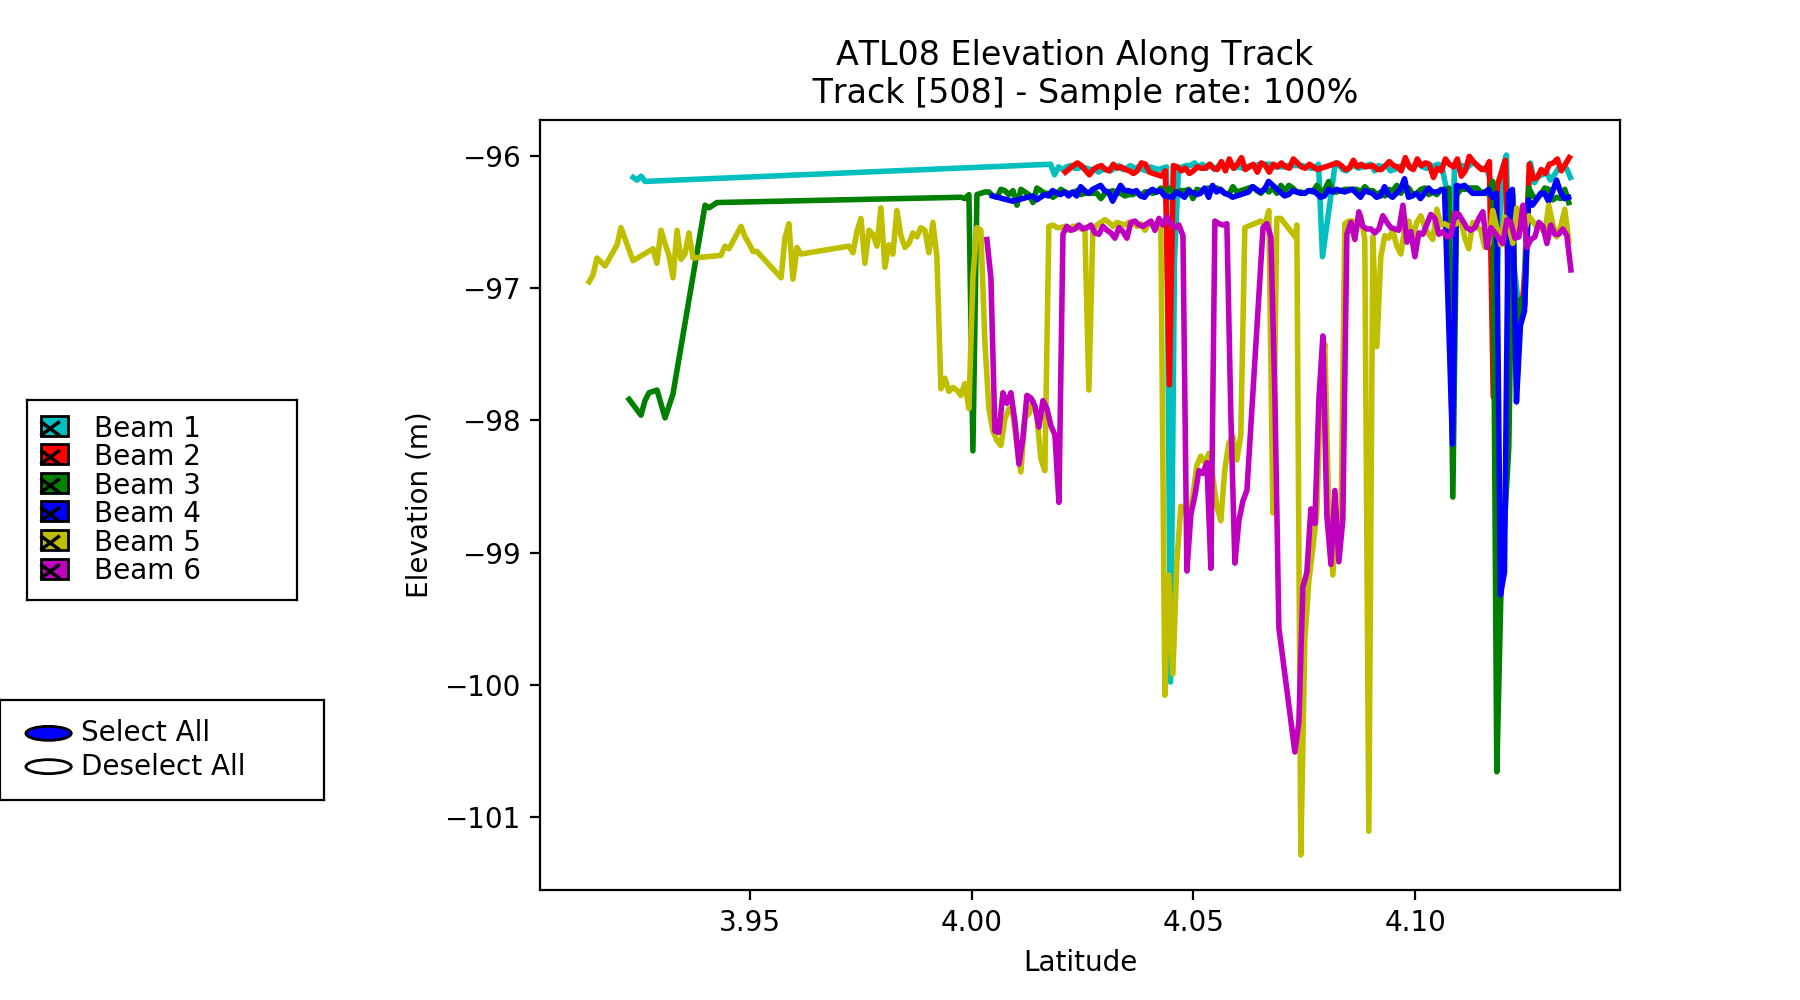

(<matplotlib.widgets.CheckButtons at 0x122f440f0>,
 <matplotlib.widgets.RadioButtons at 0x122f96128>)

In [23]:
create_plots(m1a1)

In [24]:
#returns the total number of photons 
def total_photons(df):
    return df['confidence code'].value_counts().sum()

In [25]:
#returns 5 df's for each confidence level of photons 
def get_confidence_df(df):
    noise = df.loc[df['confidence code'] == 0]
    buffer = df.loc[df['confidence code'] == 1]
    low = df.loc[df['confidence code'] == 2]
    medium = df.loc[df['confidence code'] == 3]
    high = df.loc[df['confidence code'] == 4]
    return noise,buffer,low,medium,high
    

In [26]:
#gets each beam from the photon data 
def get_laser_df(df):
    laser1 = df.loc[df.laser == 1]
    laser2 = df.loc[df.laser == 2]
    laser3 = df.loc[df.laser == 3]
    laser4 = df.loc[df.laser == 4]
    laser5 = df.loc[df.laser == 5]
    laser6 = df.loc[df.laser == 6]
    return laser1,laser2,laser3,laser4,laser5,laser6
                        

In [27]:
def get_photon_plots(ldf):
    #creating a global variable that contains the current lasers plots 
    global plots
    plots = []
    
    #creating plot
    fig, ax = plt.subplots(figsize=(9,5))
    plt.subplots_adjust(left=0.3)
    
    #gets df for each laser 
    laser1,laser2,laser3,laser4,laser5,laser6 = get_laser_df(ldf)
    laser_list = {'laser1':laser1,'laser2':laser2,'laser3':laser3,'laser4':laser4,
                  'laser5':laser5,'laser6':laser6}

    #method that plots each photon value for a given laser 
    def get_confidence_dfs(df):
        noise,buffer,low,medium,high = get_confidence_df(df)
        
        #drawing lines for each elevation and latitude value
        s1 = ax.scatter(noise.Latitude.values, noise.Height.values, color='c', label='Noise', s=1)
        s2 = ax.scatter(buffer.Latitude.values, buffer.Height.values, color='r', label='Buffer',s=1)
        s3 = ax.scatter(low.Latitude.values, low.Height.values, color='g', label='Low',s=1)
        s4 = ax.scatter(medium.Latitude.values, medium.Height.values, color='b', label='Medium',s=1)
        s5 = ax.scatter(high.Latitude.values, high.Height.values, color='y', label='High',s=1)
        return s1,s2,s3,s4,s5

    #plot the photon data for the new laser selected 
    def change_laser(label):
        global plots
        if len(plots) == 5:
            #remove existing plots 
            plots[0].remove()
            plots[1].remove()
            plots[2].remove()
            plots[3].remove()
            plots[4].remove()
            
            #selecting just the 'high' confidence photon checkbox 
            for i,l in enumerate(check.get_status()):
                #Uncheck any True Checkbox values
                if i == 4:
                    if l == False:
                        check.set_active(i)
                else:
                    if l == True:
                        check.set_active(i)
            plt.draw()

        s1,s2,s3,s4,s5 = get_confidence_dfs(laser_list[label])
        plots = [s1,s2,s3,s4,s5]
        
        #setting visibility of each plot
        s1.set_visible(False)
        s2.set_visible(False)
        s3.set_visible(False)
        s4.set_visible(False)
        s5.set_visible(True)
        #resetting title based on the laser selected 
        ax.set_title('PHOTON DATA FOR MULTIPLE SEGMENTS \n Total number of photons - ' + str(total_photons(laser_list[label])))
        plt.draw()

    change_laser('laser1')

    #creating check button
    rax = plt.axes([0.015, 0.4, 0.15, 0.2])
    visibility = [p.get_visible() for p in plots]
    labels = [p.get_label() for p in plots]
    check = CheckButtons(rax, labels, visibility)

    #setting check button parameters
    c = ['c', 'r', 'g','b', 'y', 'm']    
    [rec.set_facecolor(c[i]) for i, rec in enumerate(check.rectangles)]
    ([rec.set_width(0.1) for i, rec in enumerate(check.rectangles)])
    ([rec.set_height(0.1) for i, rec in enumerate(check.rectangles)])

    #method called on selecting checkbox
    def select_confidence(label):
        #sets visibility to the negation of the current value
        index = labels.index(label)
        plots[index].set_visible(not plots[index].get_visible())
        plt.draw()

    #make radiobutton to select which laser's photons to plot 
    labels2 = ['laser1', 'laser2','laser3','laser4','laser5','laser6']
    rax2 = plt.axes([0.0, 0.15, 0.18, 0.2])
    radio = RadioButtons(rax2, labels2)
    radio.set_active(0)
    
    #function to call on clicking buttons 
    check.on_clicked(select_confidence)
    radio.on_clicked(change_laser)

    #setting axes labels 
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Height (m)')
    #returning the buttons to ensure that they are not garbage collected 
    return radio,check

<IPython.core.display.Javascript object>


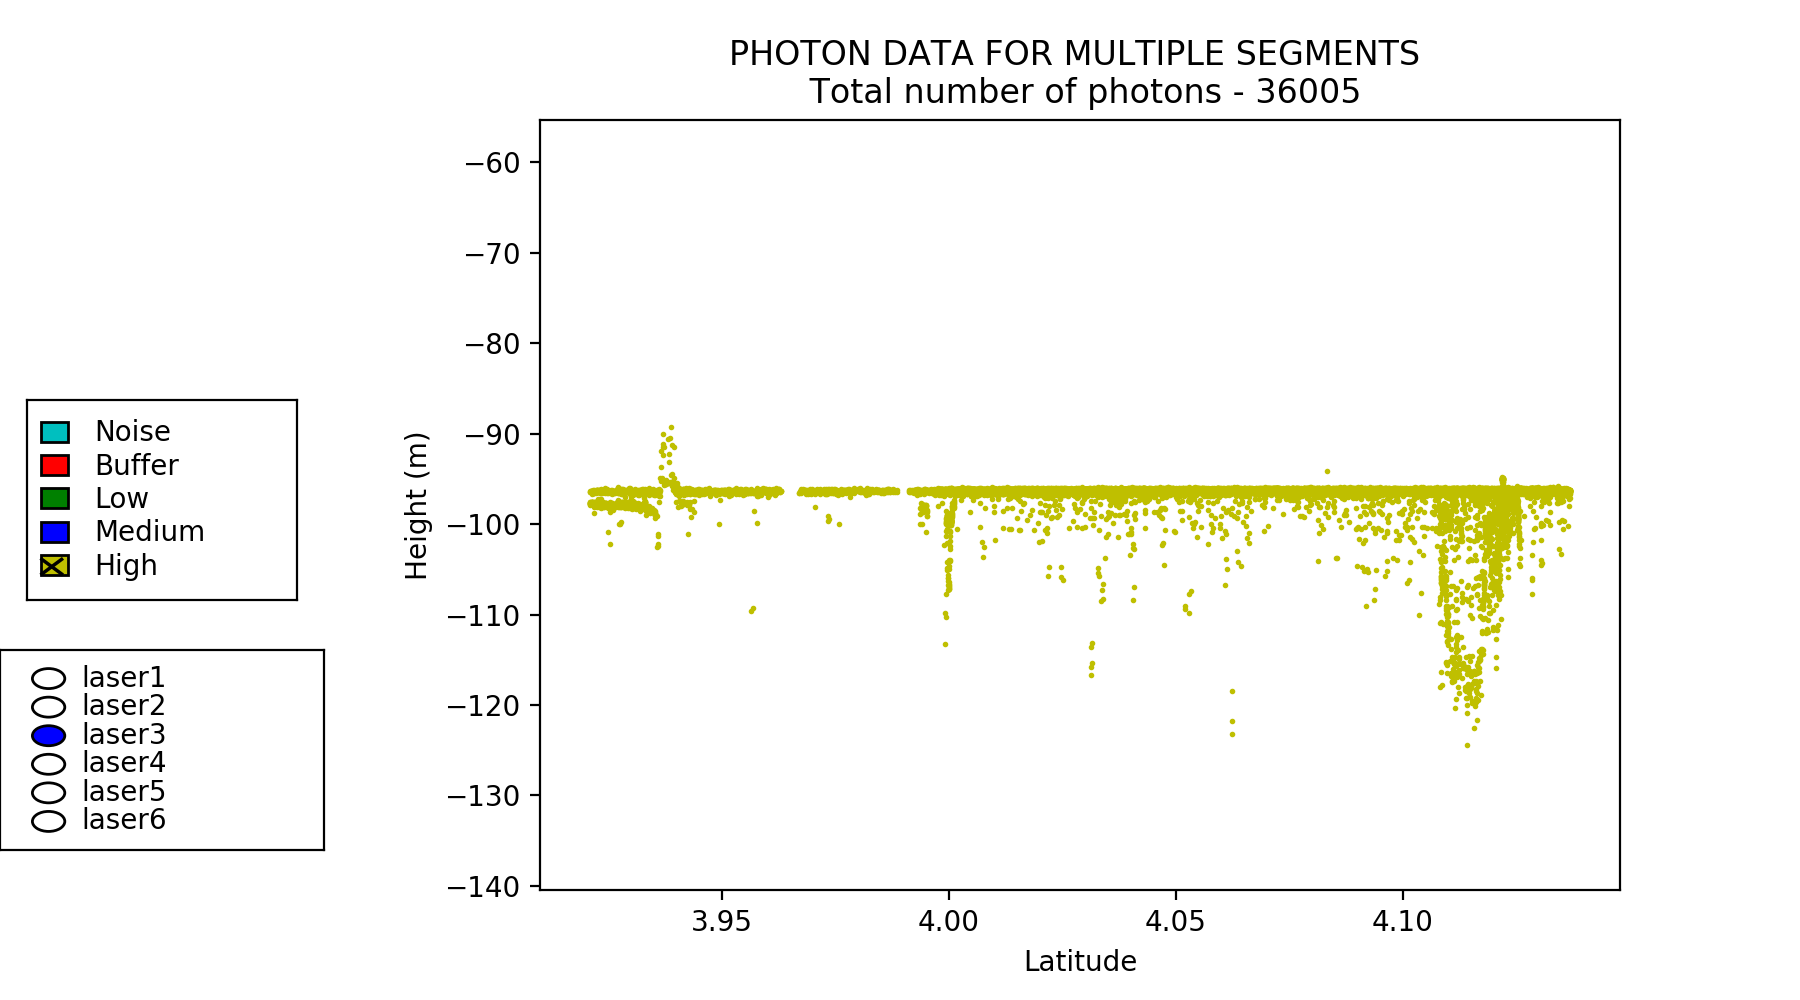

(<matplotlib.widgets.RadioButtons at 0x1261c44a8>,
 <matplotlib.widgets.CheckButtons at 0x12620a438>)

In [28]:
get_photon_plots(lasers)